# Import Library


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [3]:
raw_data=pd.read_csv('1.04. real-life example.csv')

In [4]:
raw_data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [5]:
raw_data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data=raw_data.drop('Model',axis=1)

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_n_mv=data.dropna(axis=0)

In [9]:
data_n_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


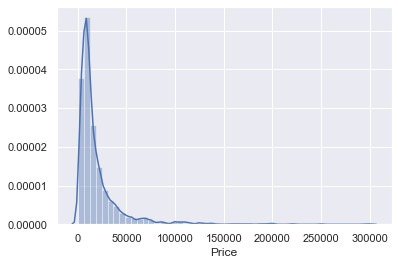

In [10]:
sns.distplot(data_n_mv['Price'])

# Deal with outlier

In [11]:
q=data_n_mv['Price'].quantile(0.99)
data_1=data_n_mv[data_n_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


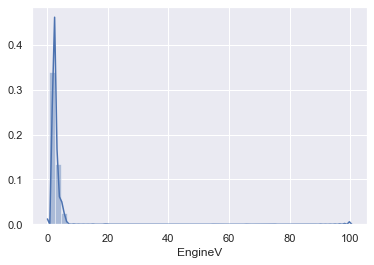

In [12]:
sns.distplot(data_n_mv['EngineV'])

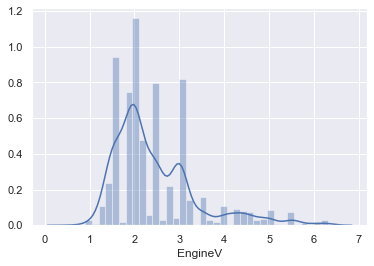

In [13]:
data_2=data_1[data_1['EngineV']<6.5]
sns.distplot(data_2['EngineV'])

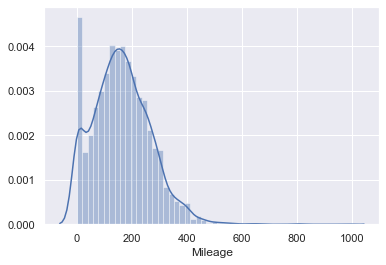

In [14]:
sns.distplot(data_n_mv['Mileage'])

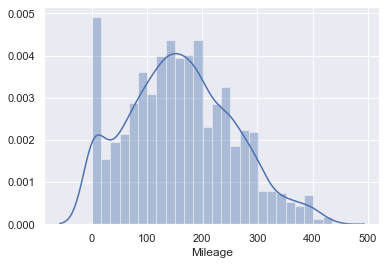

In [15]:
q=data_2['Mileage'].quantile(0.99)
data_3=data_2[data_2['Mileage']<q]
sns.distplot(data_3['Mileage'])

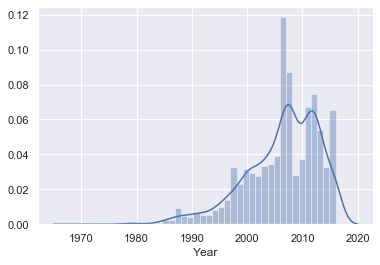

In [16]:
sns.distplot(data_n_mv['Year'])

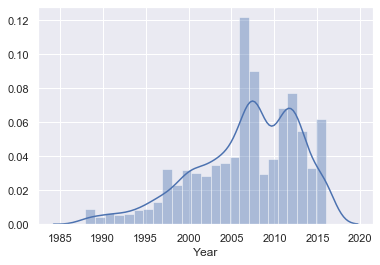

In [17]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [18]:
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Chcecking the ols assumptions


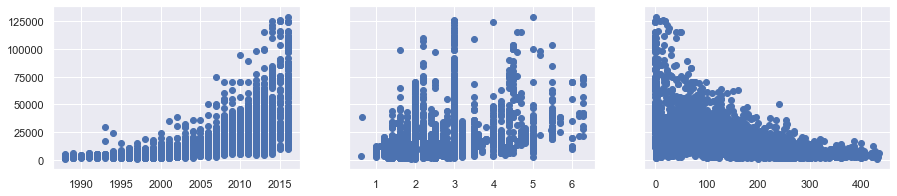

In [19]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])

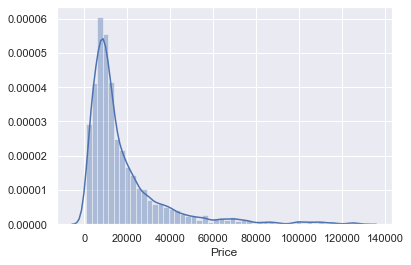

In [20]:
sns.distplot(data_cleaned['Price'])


In [21]:
log_Price=np.log(data_cleaned['Price'])

In [22]:
data_cleaned['log_Price']=log_Price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


Text(0.5, 1.0, 'log price and mil')

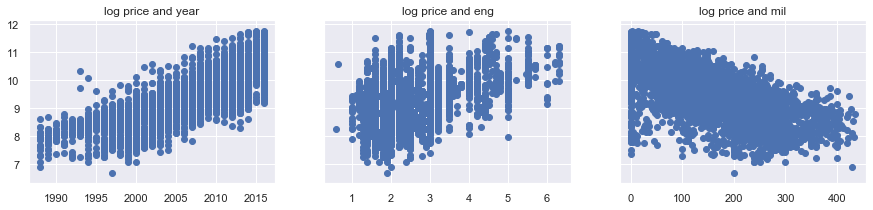

In [23]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_Price'])
ax1.set_title('log price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
ax2.set_title('log price and eng')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
ax3.set_title('log price and mil')

In [24]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

# Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=data_cleaned[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif['feature']=variable.columns

In [26]:
vif

,vif,feature
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [27]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

# create dummy variables

In [28]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [30]:
#data_with_dummies=data_with_dummies.drop(['log_price'],axis=1)
data_with_dummies

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,7.824046,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [31]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_with_dummies[['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]
vif2=pd.DataFrame()
vif2['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif2['feature']=variables.columns

In [33]:
vif2

,vif,feature
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [35]:
cols=['log_Price','Mileage', 'EngineV',  'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [36]:
data_preprocessed=data_with_dummies[cols]

In [37]:
data_preprocessed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression

In [38]:
targets=data_preprocessed['log_Price']
inputs=data_preprocessed.iloc[:,1:]

In [39]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


# scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_inputs=scaler.transform(inputs)

In [42]:
scaled_inputs

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

# train test split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2,random_state=365)

# Regression

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_hat=reg.predict(x_train)

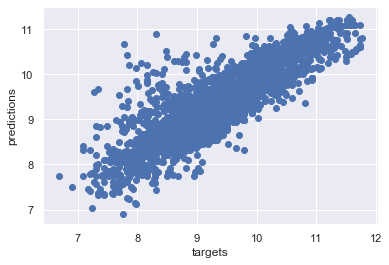

In [46]:
plt.scatter(y_train,y_hat)
plt.xlabel('targets')
plt.ylabel('predictions')
plt.show()

Text(0.5, 1.0, 'Residual plot')

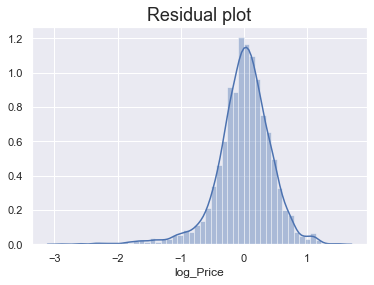

In [47]:
sns.distplot(y_train - y_hat)
plt.title("Residual plot",size=18)

# finding the weight an bias

In [48]:
reg.score(x_train,y_train)

0.744996578792662

In [50]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [51]:
reg.intercept_

9.415239458021299

In [52]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weights']=reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


# testing

In [53]:
y_hat_test=reg.predict(x_test)

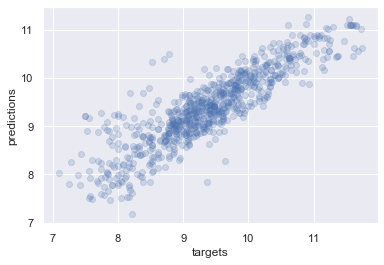

In [55]:
plt.scatter(y_test,y_hat_test,alpha=.2)
plt.xlabel('targets')
plt.ylabel('predictions')
plt.show()

In [61]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])

In [62]:
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [63]:
df_pf['Targets']=np.exp(y_test)

In [64]:
df_pf

,Predictions,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
5,21289.799394,14200.0
6,20159.189144,NaN
7,20349.617702,NaN
8,11581.537864,11950.0
9,33614.617349,NaN


In [66]:
y_test=y_test.reset_index(drop=True)

In [67]:
df_pf['Targets']=np.exp(y_test)

In [68]:
df_pf

,Predictions,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [71]:
df_pf['residual']=df_pf['Targets']-df_pf['Predictions']
df_pf['differnce%']=np.absolute(df_pf['residual']/df_pf['Targets']*100)

In [72]:
df_pf

,Predictions,Targets,residual,differnce%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
5,21289.799394,20000.0,-1289.799394,6.448997
6,20159.189144,38888.0,18728.810856,48.160900
7,20349.617702,16999.0,-3350.617702,19.710675
8,11581.537864,12500.0,918.462136,7.347697
9,33614.617349,41000.0,7385.382651,18.013128


In [76]:
df_pf.describe(include='all')

,Predictions,Targets,residual,differnce%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [77]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:"%.2f" %x)
df_pf.sort_values(by=['differnce%'])

,Predictions,Targets,residual,differnce%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
